In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Desative os avisos temporariamente
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_style("whitegrid")
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

### **Dataset**
 
 O *dataset* foi construído a partir dos dados das estações hidrometeorologicas disponibilizados pelo [ANA - Webservice](https://telemetriaws1.ana.gov.br/ServiceANA.asmx), e os dados sobre o nível do Rio Itapemirim, disponibilizado no site da Defesa Cívil do município de Cachoeiro de Itapemirim, no site [Plantão](https://www.cachoeiro.es.gov.br/defesa-civil/plantao/). Os dados foram concatenados utilizando a biblioteca *pandas*, somente onde a data e hora dos dados eram iguais.

In [14]:
dataset = pd.read_csv("dataset.csv").drop(["Unnamed: 0"], axis=1)

#### **Colunas**
 
 Lista das colunas presentes do dataset:
 - ***nível*** -> Nível em metros do rio mensurado pela Defesa Cívil
 - ***estado*** -> Estado do rio segundo a Defesa Cívil, por exemplo: *Subindo, Baixando, Estável.*
 - ***Francisco Gross*** -> Vazão em metros por segundo da afluente, disponibilizada pelo Webservice - ANA
 - ***Pacotuba*** -> Vazão em metros por segundo da afluente, disponibilizada pelo Webservice - ANA
 - ***São João*** -> Vazão em metros por segundo da afluente, disponibilizada pelo Webservice - ANA
 - ***data_hora*** -> Data e Hora referentes aos dados
 - ****Soma*** -> Soma da vazão das afluentes em metros por segundo
 
  *A soma não está presente no dataset para evitar reduncância de dados, mas é facilmente reproduzida realizando a soma das três colunas.

In [20]:
dataset['Francisco Gross'] = dataset['Francisco Gross'].fillna(dataset['Francisco Gross'].mean())
dataset['São João'] = dataset['São João'].fillna(dataset['São João'].mean())
dataset['Pacotuba'] = dataset['Pacotuba'].fillna(dataset['Pacotuba'].mean())
dataset['Soma'] = dataset['Francisco Gross'] + dataset['São João'] + dataset['Pacotuba']

dataset.head()

,nível,estado,Francisco Gross,Pacotuba,São João,data_hora,Soma
0,1.05,NaN,873.300000,93.5,37.4,2021-02-19 17:00:00,1004.200000
1,1.23,NaN,236.221213,104.2,37.8,2021-02-19 18:00:00,378.221213
2,1.33,NaN,236.221213,115.5,39.1,2021-02-19 19:00:00,390.821213
3,1.44,NaN,236.221213,128.4,39.8,2021-02-19 20:00:00,404.421213
4,1.55,NaN,236.221213,144.4,39.5,2021-02-19 21:00:00,420.121213


In [17]:
dataset.describe()

,nível,Francisco Gross,Pacotuba,São João,Soma
count,608.000000,608.000000,608.000000,608.000000,608.000000
mean,1.532007,236.221213,349.375855,67.169326,652.766394
std,0.491954,112.281722,231.021523,49.202268,319.629530
min,0.700000,46.800000,37.410000,19.290000,141.440000
25%,1.170000,165.470000,207.290000,37.280000,437.485000
50%,1.380000,208.950000,294.505000,52.450000,575.950000
75%,1.725000,273.150000,421.240000,74.920000,780.192500
max,3.000000,873.300000,1124.050000,379.030000,1742.110000


#### Gráficos interessantes sobre os dados

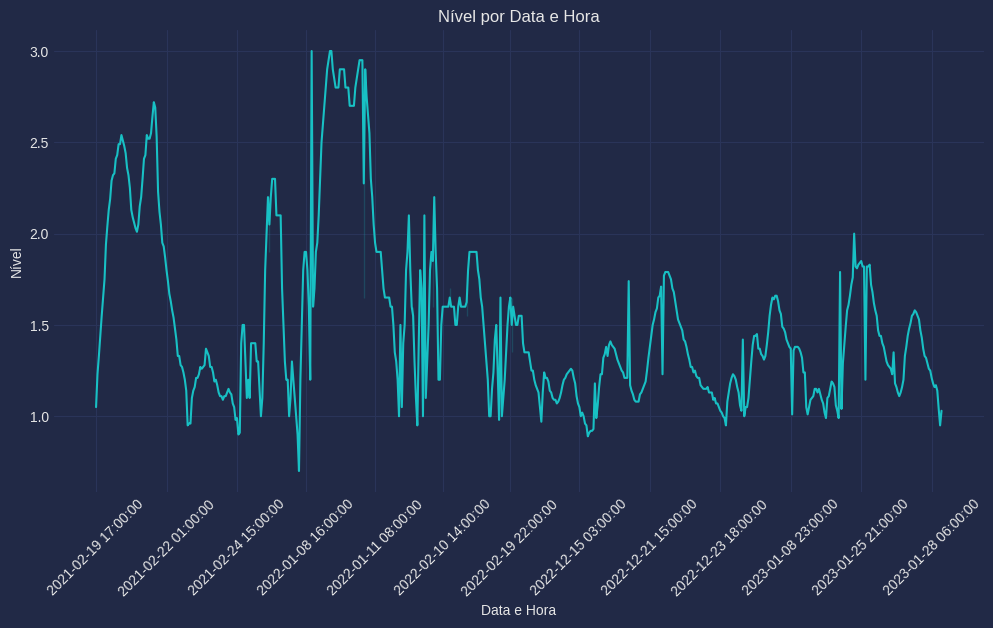

In [22]:
def plot_level():
    # Crie um gráfico de linha
    plt.figure(figsize=(12, 6))

    # Use o Seaborn para plotar o gráfico de linha
    sns.lineplot(x='data_hora', y='nível', data=dataset)

    # Configure os rótulos dos eixos
    plt.xlabel('Data e Hora')
    plt.ylabel('Nível')

    # Defina o título do gráfico
    plt.title('Nível por Data e Hora')

    # Rotacione os rótulos do eixo x para melhor visualização
    plt.xticks(rotation=45)

    # A cada n pontos, exiba os rótulos do eixo x
    n = 50
    xticks = dataset.iloc[::n]['data_hora']
    plt.xticks(xticks, rotation=45)

    # Exiba o gráfico
    plt.show()

plot_level()

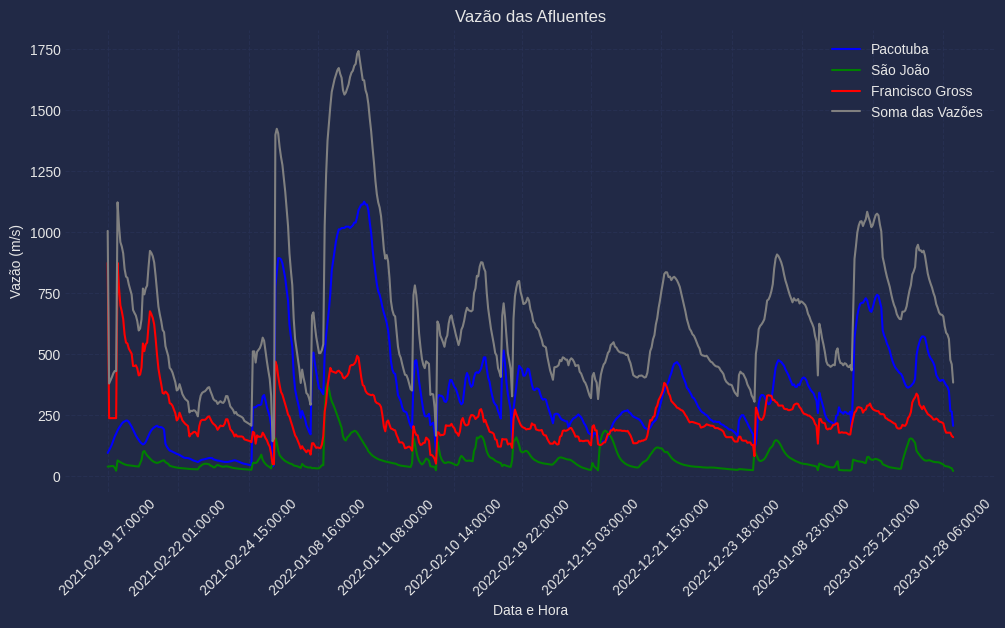

In [21]:
def plot_flow():
    # Crie um gráfico de linha
    plt.figure(figsize=(12, 6))  # Defina o tamanho da figura

    # Plote todas as métricas no mesmo subplot com cores diferentes
    sns.lineplot(data=dataset, x='data_hora', y='Pacotuba', label='Pacotuba', color='blue')
    sns.lineplot(data=dataset, x='data_hora', y='São João', label='São João', color='green')
    sns.lineplot(data=dataset, x='data_hora', y='Francisco Gross', label='Francisco Gross', color='red')
    sns.lineplot(data=dataset, x='data_hora', y='Soma', label='Soma das Vazões', color='grey')


    # Configure os rótulos dos eixos
    plt.xlabel('Data e Hora')
    plt.ylabel('Vazão (m/s)')

    # Defina o título do gráfico
    plt.title('Vazão das Afluentes')

    # Rotacione os rótulos do eixo x para melhor visualização
    plt.xticks(rotation=45)

    n = 50  # A cada n pontos
    xticks = dataset.iloc[::n]['data_hora']
    plt.xticks(xticks, rotation=45)

    # Adicione uma grade de fundo
    plt.grid(True, linestyle='--', alpha=0.6)

    # Exiba uma legenda
    plt.legend()

    # Exiba o gráfico
    plt.show()

plot_flow()